<a href="https://colab.research.google.com/github/nikopj/SummerML/blob/master/Day6/lab_music_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# M6: *Lab*:  Neural Networks for Music Classification

In this lab, we will learn to how to:
* Extract simple features from audio samples for machine learning tasks such as speech recognition and classification
* Build a simple neural network for music classification using these features
* Use a callback to store the loss and accuracy history in the training process
* Optimize the learning rate of the neural network

To illustrate the basic concepts, we will look at a relatively simple music classification problem.  Given a sample of music, we want to determine which instrument (e.g. trumpet, violin, piano) is playing.  


In [0]:
import tensorflow as tf

Then, load the other packages.

In [0]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

#### Audio Feature Extraction with Librosa

**The key to audio classification is to extract the correct features.** 

In addition to `keras`, we will need the `librosa` package.  The `librosa` package in python has a rich set of methods extracting the features of audio samples commonly used in machine learning tasks such as speech recognition and sound classification. 


In [0]:
import librosa
import librosa.display
import librosa.feature

In this lab, we will use a set of music samples from this [website](http://theremin.music.uiowa.edu).

You can play the audio sample by copying the file to your local machine and playing it on any media player.  If you listen to it you will hear a soprano saxaphone (with vibrato) playing four notes (C, C#, D, Eb).

In [0]:
import requests
fn = "SopSax.Vib.pp.C6Eb6.aiff"
url = "http://theremin.music.uiowa.edu/sound files/MIS/Woodwinds/sopranosaxophone/"+fn

req = requests.get(url)
with open(fn, "wb") as file: # write to file
  file.write(req.content)

Next, use `librosa` command `librosa.load` to read the audio file with filename `fn` and get the samples `y` and sample rate `sr`.

In [0]:
y, sr = librosa.load(fn)

Extracting features from audio files is an entire subject on its own.  A commonly used set of features are called the Mel Frequency Cepstral Coefficients (MFCCs).  These are derived from the so-called mel spectrogram which is something like a regular spectrogram, but the power and frequency are represented in log scale, which more naturally aligns with human perceptual processing.  You can run the code below to display the mel spectrogram from the audio sample.

You can easily see the four notes played in the audio track.  You also see the 'harmonics' of each notes, which are other tones at integer multiples of the fundamental frequency of each note.

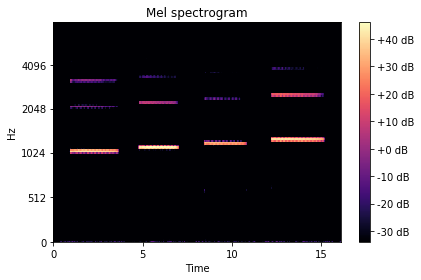

In [0]:
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)
librosa.display.specshow(librosa.amplitude_to_db(S),
                         y_axis='mel', fmax=8000, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()

#### Downloading the Data

Using the MFCC features described above, Eric Humphrey and Juan Bellow have created a complete data set that can used for instrument classification.  Essentially, they collected a number of data files from the website above.  

For each audio file, they segmented the track into notes and then extracted 120 MFCCs for each note.  The goal is to recognize the instrument from the 120 MFCCs.  The process of feature extraction is quite involved.  So, we will just use their processed data provided at:

https://github.com/marl/dl4mir-tutorial/blob/master/README.md

Note the password.  Load the four files into some directory, say  `instrument_dataset`.  Then, load them with the commands.

In [0]:
Xtr = np.load('uiowa_train_data.npy')
ytr = np.load('uiowa_train_labels.npy')
Xts = np.load('uiowa_test_data.npy')
yts = np.load('uiowa_test_labels.npy')

Looking at the data files:
* What are the number of training and test samples?
* What is the number of features for each sample?
* How many classes (i.e. instruments) are there per class?

Hint: use .shape


In [0]:
# TODO


Before continuing, you must scale the training and test data, `Xtr` and `Xts`.  Compute the mean and std deviation of each feature in `Xtr` and create a new training data set, `Xtr_scale`, by subtracting the mean and dividing by the std deviation.  Also compute a scaled test data set, `Xts_scale` using the mean and std deviation learned from the training data set.

In [0]:
# Math behind scaling the training and test matrices
#Xtr_mean = np.mean(Xtr,axis = 0)
#Xtr_std  = np.std(Xtr,axis = 0)

#Xtr_scale = (Xtr - Xtr_mean[None,:])/Xtr_std[None,:]
#Xts_scale = (Xts - Xtr_mean[None,:])/Xtr_std[None,:]



In [0]:
from sklearn import preprocessing

# TODO using sklearn




In [0]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Activation
import tensorflow.keras.backend as K


## Building a Neural Network Classifier

Following the example in MNIST demo, clear the keras session.  Then, create a neural network `model` with:
* `nh=256` hidden units
* `sigmoid` activation
* select the input and output shapes correctly
* print the model summary

In [0]:
# TODO: clear session


In [0]:
# TODO: construct the model
# nin = ...
# nout = ...
# nh = ...

# model = 
# model.add(...)
# model.add(...)

In [0]:
# TODO:  Print the model summary


Create an optimizer and compile the model.  Select the appropriate loss function and metrics.  For the optimizer, use the Adam optimizer with a learning rate of 0.001

In [0]:
from tensorflow.keras import optimizers

opt = optimizers.Adam(lr=0.001) 
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Fit the model for 10 epochs using the scaled data for both the training and validation.  Use the `validation_data` option to pass the test data.  Also, pass the callback class create above.  Use a batch size of 100.  Your final accuracy should be >99%.

In [0]:
#TODO:

#hist = model.fit(..)



Plot the validation accuracy saved in `hist.history` dictionary. This gives one accuracy value per epoch.  You should see that the validation accuracy saturates at a little higher than 99%.  After that it bounces around due to the noise in the stochastic gradient descent.

In [0]:
# val_accuracy = hist.history['val_acc']

# TODO: plot val_accuracy vs epochs (y vs x)
# plt.plot(..)



Plot the loss values saved in the `hist.history` dictionary.  You should see that the loss is steadily decreasing.  Use the `semilogy` plot.

In [0]:
# loss = hist.history['loss']

# TODO: plot loss vs epochs (y vs x)
# plt.semilogy(..)


#### Optimizing the Learning Rate

One challenge in training neural networks is the selection of the learning rate.  Rerun the above code, trying four learning rates as shown in the vector `rates`.  For each learning rate:
* clear the session
* construct the network
* select the optimizer.  Use the Adam optimizer with the appropriate learrning rate.
* train the model for 20 epochs
* save the accuracy and losses

In [0]:
rates = [0.01,0.001,0.0001]
batch_size = 100
loss_hist = []

# TODO
# You can use a for loop for the learning rates


Plot the loss funciton vs. the epoch number for all three learning rates on one graph.  You should see that the lower learning rates are more stable, but converge slower.

In [0]:
# TODO: Plot all the loss functions vs the epochs for all the learning rates in 
# one plot
